In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Simple Nerual example

In [2]:
Num_features = 8
Num_neurons = 4

In [3]:
# creating placeholders for data
x = tf.placeholder(tf.float32,(None,Num_features))
# creating variable for weights and bias
W = tf.Variable(tf.random_uniform([Num_features,Num_neurons]))
b = tf.Variable(tf.ones([Num_neurons]))

In [4]:
xW = tf.matmul(x,W)
z = tf.add(xW,b)
#apply sigmoid for activation
a = tf.sigmoid(z)
#initialize the global variables
init = tf.global_variables_initializer()

In [5]:
#Start the session
with tf.Session() as sess:
    sess.run(init)
    result = sess.run(a,feed_dict={x:np.random.random([2,Num_features]) })
    

In [6]:
print(result)

[[ 0.9350189   0.96364856  0.9639377   0.94277889]
 [ 0.96376878  0.98401493  0.97984856  0.95768905]]


## Regression example 

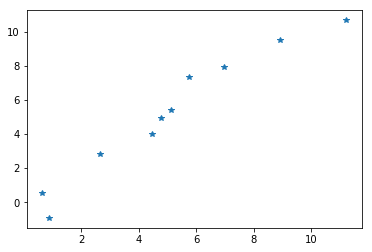

In [7]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
plt.plot(x_data,y_label,'*')

In [8]:
#create the tf variables
m = tf.Variable(0.45)
b = tf.Variable(0.76)
error = 0

In [9]:
#create the objective function and then iterate over the samples to find squared error
for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    
    error += (y - y_hat)**2
    

In [10]:
init = tf.global_variables_initializer()
#apply optimization for the error 
optizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = optizer.minimize(error)


In [11]:
with tf.Session() as sess:
    sess.run(init)
    train_steps = 100
    for i in range(train_steps):
        sess.run(train)
        
    final_m , final_b = sess.run([m,b])

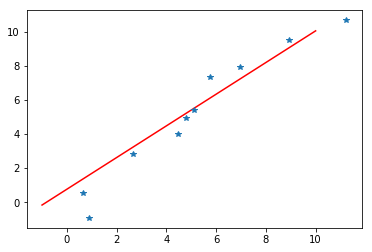

In [12]:
x_test = np.linspace(-1,10,10)
#cal prediction
y_pred = final_m*x_test + final_b

#plot both
plt.plot(x_test,y_pred,'r')
plt.plot(x_data,y_label,'*')

## Realistic Regression 
##### tf.estimator introduced !

In [16]:
import pandas as pd

In [17]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))

In [26]:
#create some response labels
y_true = (0.5 * x_data) + 6 + noise

In [27]:
#conver to pandas dataframe
x_df = pd.DataFrame(data=x_data,columns=['X DATA'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [28]:
# x_df.head()
# y_df.head()
my_data = pd.concat([x_df,y_df],axis=1)

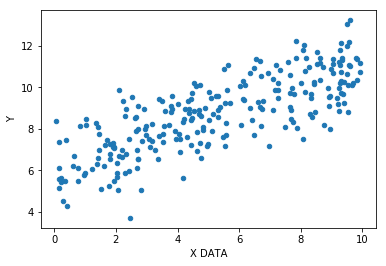

In [29]:
my_data.sample(n=250).plot(kind='scatter',x='X DATA',y='Y')

In [31]:
#define Variables and Placeholders
batch_size = 10
m = tf.Variable(0.2)
b = tf.Variable(0.57)

xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

#define model and error
y_hat = m*xph + b

error = tf.reduce_sum(tf.square(yph - y_hat))

In [33]:
#create an optimizer 
opti = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = opti.minimize(error)
#initialize global variables
init = tf.global_variables_initializer()

In [42]:
#START THE SESSION
with tf.Session() as sess:
    sess.run(init)
    #create num of batches
    batches = 10000
    for i in range(batches):
        rand_index = np.random.randint(len(x_data),size=batch_size)
        #create feed dict
        fdict ={xph:x_data[rand_index],yph:y_true[rand_index]}
        sess.run(train,feed_dict=fdict)
    final_m, final_b = sess.run([m,b])
    

true model : y_true = (0.5 * x_data) + 6 + noise 

Where m = 0.5 ; b = 6

In [43]:
print(final_m)
print(final_b)

0.506998
5.99483
